In [38]:
import pandas as pd
from glob import glob

# Old dataset

In [137]:
cnt = pd.DataFrame()
for file in glob('../calibS-1/*.txt'):
  print(file)
  cnt = pd.concat([cnt,pd.read_csv(file,sep=' ', header=None,index_col=0)],axis=1)

../calibS-1/Joints.txt
../calibS-1/GearTorque.txt
../calibS-1/MeasuredPositionsLeica.txt
../calibS-1/MeasuredPositionsTS_Model.txt
../calibS-1/RobotPositions.txt
../calibS-1/DriveTorque.txt


In [144]:
cnt.columns=range(cnt.shape[1])
cnt

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
0,94.429290,-53.369570,67.849075,4.676737,17.413774,-15.608587,0.000000,0.00000,0.0000,0.000000,...,1257.782997,-93.431758,1.529676,176.695513,0.003898,0.054700,0.011997,-0.004777,-0.002837,0.011410
1,91.151010,-52.101610,66.189760,48.378105,27.118320,-67.453530,0.000000,0.00000,0.0000,0.000000,...,1257.630117,-111.705106,0.419940,176.379760,-0.019028,-0.044321,-0.028385,-0.010518,0.000923,-0.017298
2,100.432630,-48.472008,59.058144,-52.297527,44.670227,56.954082,0.000000,0.00000,0.0000,0.000000,...,1258.022590,-56.795023,3.190011,178.263949,0.012725,-0.079608,0.004819,-0.009465,-0.006079,-0.009087
3,94.012840,-23.638317,6.143470,4.788668,91.820900,-16.738571,0.000000,0.00000,0.0000,0.000000,...,1257.803445,-100.632358,43.634065,175.310833,0.016779,0.017424,0.016787,-0.008514,-0.006572,0.010218
4,94.148890,-49.696484,88.087010,177.040050,57.309727,-188.652970,0.000000,0.00000,0.0000,0.000000,...,1257.542306,-93.468308,-49.139862,174.807088,-0.014005,0.021922,-0.021295,0.000226,-0.008891,0.011471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,117.175705,-59.779903,79.798630,-50.830210,18.732674,45.713800,63.593830,430.05590,-3398.1540,-281.328430,...,1228.093930,-98.760830,0.602824,178.536476,0.234641,-1.610079,11.831888,1.083975,0.181235,-0.071973
137,115.867810,-49.201378,54.996130,-14.165884,57.914726,18.896187,-201.595750,455.70108,-2695.3164,17.449604,...,1228.183461,-88.123909,30.195346,178.486122,-0.744513,-1.705536,9.381756,-0.065240,0.433556,-0.182495
138,121.332405,-58.264240,89.268166,-121.737330,39.902344,119.729770,-492.210240,383.26523,-2325.7795,-61.595394,...,1228.140355,-86.785652,-24.321984,178.561696,-1.841692,-1.438289,8.074601,0.228589,-0.118709,0.732410


In [139]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    cnt,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (98, 36)
Test shape: (42, 36)


In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df.loc[:,0:18], train_df.loc[:,18:23])  # y_train имеет форму (n_samples, 3)

LinearRegression()

In [141]:
predictions = model.predict(test_df.loc[:,0:18])

In [142]:
test_df.loc[:,:].head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
108,61.806920,-53.104763,62.363480,9.456014,62.495102,-37.666634,187.07207,316.40353,-2521.4710,-62.423813,...,1188.704536,-82.892005,39.363703,178.567493,0.693030,-1.184996,8.768266,0.238716,0.518605,0.341370
67,128.384100,-41.006990,59.314450,-2.492036,67.046580,24.707090,0.00000,0.00000,0.0000,0.000000,...,811.591971,-90.666548,54.479548,179.173165,-0.021012,-0.061592,-0.021535,-0.009224,0.000468,-0.012845
31,80.176704,-41.278110,91.722790,166.641190,42.064120,-179.440020,0.00000,0.00000,0.0000,0.000000,...,635.926350,-85.183716,-21.082574,173.201796,-0.009484,0.026438,0.021700,-0.007998,-0.005395,0.010140
119,105.344990,-78.129930,111.939130,-85.528810,10.253825,81.599320,828.07970,-1536.53980,-2413.3242,-88.328210,...,1086.994272,-90.639317,3.660024,177.254659,3.043804,5.744670,8.396720,0.336079,-1.172295,-0.731475
42,114.573320,-40.498665,33.105347,-25.976200,48.153755,20.032925,0.00000,0.00000,0.0000,0.000000,...,1513.490501,-89.278699,4.944868,178.392713,-0.004936,0.048920,0.018865,0.001289,-0.002646,-0.017048


In [143]:
predictions[0]

array([ 535.92726826,  -50.53532288, 1990.55812042,  -40.59537785,
         -3.12755608,   30.20893451])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
mean_absolute_error(test_df.loc[:,18:23],predictions)

16.387967276919284

In [58]:
mean_squared_error(test_df.loc[:,18:23],predictions)

1810.6992396659746

In [59]:
r2_score(test_df.loc[:,18:23],predictions)

0.9197681950407818

In [60]:
corr_matrix = cnt.corr()

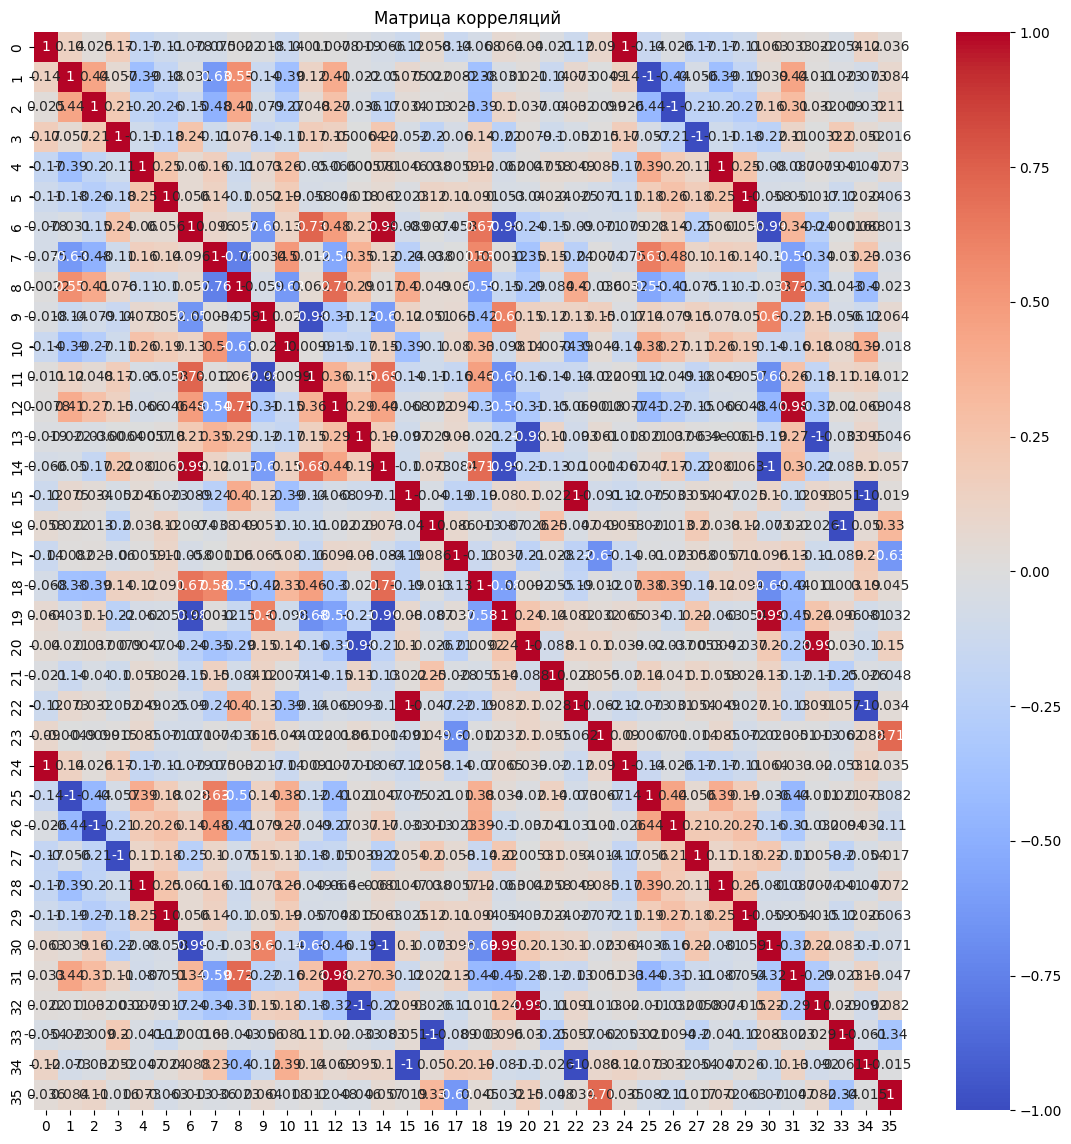

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

# New  dataset

UnboundLocalError: local variable 'ind' referenced before assignment

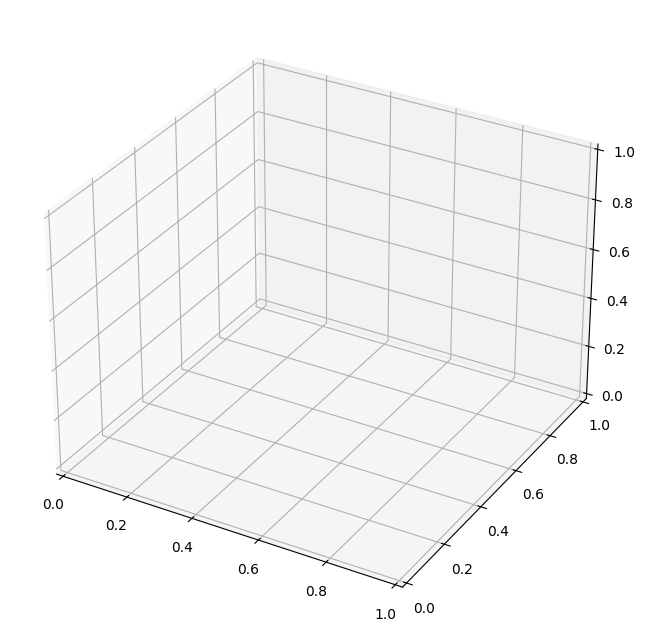

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_points(filename):
    """Загрузка данных из файла с обработкой BOM и разделителей"""
    # Читаем файл как текст, удаляем BOM, затем загружаем в numpy
    with open(filename, 'r', encoding='utf-8-sig') as f:  # utf-8-sig удаляет BOM
        data = np.loadtxt(f, delimiter=None)  # None - автоматическое определение разделителя
    
    positions = data[:, 1:4]  # X, Y, Z
    orientations = data[:, 4:7]  # RZ, RY, RX
    indexes = data[:, 0]
    return positions, orientations, indexes

def visualize_points(positions, orientations, indexes, scale=0.1):
    """Визуализация точек с ориентацией"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Отображаем точки
    if ind == 529:
        ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', s=10, label='Точки')
    else:
        ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='r', s=10, label='Точки')
    
    # Отображаем ориентацию (векторы)
    for pos, ori, ind in zip(positions, orientations, indexes):
        # Преобразуем углы Эйлера в вектор направления
        # (упрощенное представление - можно использовать матрицы поворота для точности)
        rx, ry, rz = ori
        dx = np.cos(rz) * np.cos(ry) * scale
        dy = np.sin(rz) * np.cos(ry) * scale
        dz = np.sin(ry) * scale

        ax.quiver(pos[0], pos[1], pos[2], dx, dy, dz, color='r', length=scale, normalize=True)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Облако ориентированных точек')
    ax.legend()
    plt.show()

# Пример использования
if __name__ == "__main__":
    positions, orientations, indexes = load_points('../data/collect800Points100-20-110/RobotPositions.txt')
    visualize_points(positions, orientations, indexes)


    mesured_positions, mesured_orientations = load_points('../data/AviaStar_TestNormalizeModelV5/MeasuredPositionsTS_ModelForestNewV5.txt')
    # visualize_points(mesured_positions, mesured_orientations)


In [286]:
import pandas as pd
import os
from tqdm import tqdm

def combine_files_with_index_check(folders, target_files, output_file=None):
    """
    Объединяет файлы с проверкой индексов
    
    Параметры:
    - folders: список путей к папкам
    - target_files: имена файлов ['DriveTorque.txt', 'GearTorque.txt', 'Joints.txt']
    - output_file: путь для сохранения (опционально)
    
    Возвращает:
    - Объединенный датафрейм (19 колонок)
    """
    
    # Результирующий датафрейм
    final_df = pd.DataFrame()
    stats = {'total_folders': 0, 'processed_folders': 0, 'errors': 0}
    
    print(f"Обработка {len(folders)} папок...")
    
    for folder in tqdm(folders):
        stats['total_folders'] += 1
        folder_data = {}
        index_ref = None
        valid_folder = True
        
        # Сначала загружаем все файлы из папки и проверяем индексы
        for file_name in target_files:
            file_path = os.path.join(folder, file_name)
            
            try:
                if os.path.exists(file_path):
                    # Чтение файла (7 колонок: индекс + 6 данных)
                    df = pd.read_csv(file_path, sep=' ', header=None, engine='python')
                    
                    # Проверка структуры файла
                    if len(df.columns) != 7:
                        print(f"\nОшибка в {file_path}: ожидается 7 колонок, получено {len(df.columns)}")
                        valid_folder = False
                        break
                        
                    # Устанавливаем индекс (первая колонка)
                    df = df.set_index(0)
                    
                    # Проверка совпадения индексов между файлами
                    if index_ref is None:
                        index_ref = df.index
                    elif not index_ref.equals(df.index):
                        print(f"\nНесовпадение индексов в {file_path}")
                        valid_folder = False
                        break
                        
                    folder_data[file_name] = df
                    
            except Exception as e:
                print(f"\nОшибка чтения {file_path}: {str(e)}")
                valid_folder = False
                break
        
        # Если все файлы загружены и индексы совпадают
        if valid_folder and len(folder_data) == len(target_files):
            try:
                # Горизонтальное объединение (6 колонок из каждого файла)
                combined = pd.concat([
                    # folder_data['DriveTorque.txt'],
                    folder_data['GearTorque.txt'],
                    folder_data['Joints.txt'],
                    folder_data['RobotPositions.txt'],
                    folder_data['MeasuredPositionsLeica.txt']
                ], axis=1)
                
                # Проверка количества колонок (5 файла × 6 колонок = 30)
                # if len(combined.columns) != 30:
                #     print(f"\nНеверное количество колонок в {folder}: {len(combined.columns)}")
                #     stats['errors'] += 1
                #     continue
                
                # Добавляем метку папки (19-я колонка)
                # combined['source_folder'] = os.path.basename(folder.rstrip('/'))
                
                # Добавляем к итоговому датафрейму
                final_df = pd.concat([final_df, combined], axis=0)
                stats['processed_folders'] += 1
                
            except Exception as e:
                print(f"\nОшибка объединения в {folder}: {str(e)}")
                stats['errors'] += 1
    
    # Генерация имен колонок
    if not final_df.empty:
        column_names = (
            # [f'DriveTorque_{i}' for i in range(1, 7)] +
            [f'GearTorque_{i}' for i in range(1, 7)] +
            [f'Joints_{i}' for i in range(1, 7)] +
            [f'RobotPositions_{i}' for i in range(1, 7)] +
            [f'MeasuredPositionsLeica_{i}' for i in range(1, 7)]
            # +['source_folder']
        )
        
        final_df.columns = column_names
        
        # Сохранение
        if output_file:
            try:
                final_df.to_csv(output_file, index=True)
                print(f"\nРезультат сохранен в {output_file}")
            except Exception as e:
                print(f"\nОшибка сохранения: {str(e)}")
    
    # Статистика
    print("\nСтатистика:")
    print(f"Успешно обработано папок: {stats['processed_folders']}/{stats['total_folders']}")
    print(f"Ошибок: {stats['errors']}")
    print(f"Итоговый размер: {final_df.shape} (ожидается 31 колонок)")
    
    return final_df

# Конфигурация
target_files = ['GearTorque.txt', 'Joints.txt', 'RobotPositions.txt', 'MeasuredPositionsLeica.txt']
folders = [
    '../calibS-1/',
    '../data/collect800Points100-20-110/'
    # '../data/calibF/',
    # '../data/robLocate/',
    # '../data/spiraltestS/'
]

# Запуск обработки
result = combine_files_with_index_check(
    folders=folders,
    target_files=target_files,
    output_file='combined_results.csv'
)




Обработка 2 папок...


100%|██████████| 2/2 [00:00<00:00, 12.13it/s]



Результат сохранен в combined_results.csv

Статистика:
Успешно обработано папок: 2/2
Ошибок: 0
Итоговый размер: (969, 24) (ожидается 31 колонок)


In [303]:
result2 = result.drop(result.columns[-6:],axis=1)
# result2 = result2.drop(['RobotPositions_4','RobotPositions_5'],axis=1)
from sklearn.preprocessing import StandardScaler

cols = result2.columns
idx = result2.index

scaler = StandardScaler()
result2_scaled = pd.DataFrame(scaler.fit_transform(result2), columns=cols, index=idx)

In [304]:
result2

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,RobotPositions_1,RobotPositions_2,RobotPositions_3,RobotPositions_4,RobotPositions_5,RobotPositions_6
0,,,,,,,,,,,,,,,,,,
0,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,94.42929,-53.369570,67.849075,4.676737,17.413774,-15.608587,-247.996989,-2933.613314,1257.782997,-93.431758,1.529676,176.695513
1,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,91.15101,-52.101610,66.189760,48.378105,27.118320,-67.453530,-247.875783,-2933.607102,1257.630117,-111.705106,0.419940,176.379760
2,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,100.43263,-48.472008,59.058144,-52.297527,44.670227,56.954082,-248.254642,-2933.615209,1258.022590,-56.795023,3.190011,178.263949
3,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,94.01284,-23.638317,6.143470,4.788668,91.820900,-16.738571,-248.309369,-2933.869843,1257.803445,-100.632358,43.634065,175.310833
4,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,94.14889,-49.696484,88.087010,177.040050,57.309727,-188.652970,-248.261141,-2933.441388,1257.542306,-93.468308,-49.139862,174.807088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,657.77606,2982.6536,-1581.9062,-626.897700,423.34216,214.77985,-153.41441,-40.239994,74.234260,115.302340,-69.956640,-73.663650,903.999047,1248.001342,5749.998535,99.999590,-19.999636,-109.999894
826,890.20350,3592.6414,-996.2073,-674.898440,434.74506,222.17130,-150.82387,-35.903340,74.383064,115.027885,-69.941230,-68.396600,1016.997827,1404.000521,5749.999419,99.999611,-19.999622,-109.999739
827,815.33417,4145.8545,-2559.6785,63.609352,-628.51404,220.71504,-148.23491,-30.995667,73.304640,115.141525,-70.104350,-63.817284,1129.997916,1559.998947,5750.000354,99.999804,-19.999715,-109.999864


In [305]:
result2_scaled


,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,RobotPositions_1,RobotPositions_2,RobotPositions_3,RobotPositions_4,RobotPositions_5,RobotPositions_6
0,,,,,,,,,,,,,,,,,,
0,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.516090,0.661132,-0.554616,-0.497819,1.046256,0.475313,-0.428541,-2.405981,-1.568885,-2.507785,1.598784,2.856752
1,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.574982,0.716390,-0.615790,-0.083585,1.301601,-0.038161,-0.428312,-2.405975,-1.569002,-2.783419,1.499450,2.853251
2,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.408244,0.874567,-0.878711,-1.037863,1.763425,1.193975,-0.429029,-2.405982,-1.568701,-1.955158,1.747404,2.874144
3,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.523571,1.956816,-2.829510,-0.496758,3.004048,0.464122,-0.429133,-2.406216,-1.568869,-2.616398,5.367636,2.841398
4,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.521127,0.821205,0.191493,1.135967,2.095994,-1.238523,-0.429041,-2.405823,-1.569069,-2.508336,-2.936752,2.835812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.852396,1.483953,0.472155,-2.264672,1.005893,1.236183,-4.968435,1.233317,-0.319214,0.550772,-1.252626,-0.099666,1.752442,1.431485,1.867205,0.409926,-0.328349,-0.322276
826,1.150643,1.732158,1.003633,-2.443426,1.036353,1.272303,-4.921897,1.422308,-0.313729,0.548170,-1.252220,-0.047501,1.966374,1.574645,1.867206,0.409927,-0.328348,-0.322274
827,1.054572,1.957261,-0.415100,0.306759,-1.803871,1.265186,-4.875388,1.636184,-0.353487,0.549247,-1.256512,-0.002147,2.180308,1.717805,1.867207,0.409929,-0.328356,-0.322276


In [306]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем к нужным столбцам
for col in result2_scaled.columns:
    result2_scaled = remove_outliers_iqr(result2_scaled, col)

In [307]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    result2_scaled,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df

Train shape: (652, 18)
Test shape: (280, 18)


,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,RobotPositions_1,RobotPositions_2,RobotPositions_3,RobotPositions_4,RobotPositions_5,RobotPositions_6
0,,,,,,,,,,,,,,,,,,
5,-1.366644,0.127781,-1.085579,0.069787,-0.738701,1.286971,-0.575093,0.899403,-0.794277,-1.763861,-0.268257,1.672386,-0.172960,0.143030,-1.192390,0.409933,-0.328337,-0.322276
380,1.089811,-1.017966,-0.116325,-1.072037,1.810247,1.226300,0.157081,-1.795275,1.569252,0.871090,0.089438,-0.919855,0.896712,0.286199,0.146182,0.409924,-0.328373,-0.322281
716,-1.380772,-0.292458,-1.074247,0.086635,-0.644806,-0.904042,0.894846,0.068300,-0.626524,0.674799,-0.973238,-0.607904,-0.172964,0.286194,1.293535,0.409943,-0.328437,-0.322276
472,-0.841498,-0.107884,-0.829231,0.562022,0.936390,-1.086139,0.501363,-0.573992,0.984628,0.458560,-0.112389,-0.381759,0.040975,0.572516,0.528633,0.409936,-0.328386,-0.322280
370,-1.137512,-1.304749,-0.316943,1.338212,1.981526,-1.166211,0.115566,-1.042972,0.269229,1.036846,-0.332070,-1.114921,0.040973,-0.143288,0.146183,0.409931,-0.328374,-0.322279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.615177,-0.865905,-1.117233,0.001715,-1.553625,-0.392404,-0.643188,-0.802224,1.187003,-0.045069,0.836481,0.023194,0.050772,-1.636134,-1.595782,-2.465663,1.790926,2.801300
142,-0.927876,-0.675835,-0.252132,1.602035,1.499153,-1.135223,-0.414139,-0.278473,-0.595841,-2.009210,-0.580061,1.999873,0.040973,-0.429608,-0.618715,0.409930,-0.328395,-0.322280
733,-1.037464,0.953831,-0.934691,0.270207,-0.453620,-0.799927,0.805182,0.635157,-2.148671,0.782432,-1.406181,-0.861211,-0.600832,-0.143290,1.293534,0.409944,-0.328430,-0.322278


In [308]:
from sklearn.linear_model import LinearRegression

X_train = train_df.loc[:, :'Joints_6']  # Признаки (колонки 0-17)
y_train = train_df.loc[:, 'RobotPositions_1':]  # Целевые (колонки 18-23)
X_test = test_df.loc[:, :'Joints_6'] 
y_test = test_df.loc[:, 'RobotPositions_1':]


In [251]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [252]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² score на тренировочных данных: {train_score:.3f}")
print(f"R² score на тестовых данных: {test_score:.3f}")

R² score на тренировочных данных: 0.661
R² score на тестовых данных: -357.480


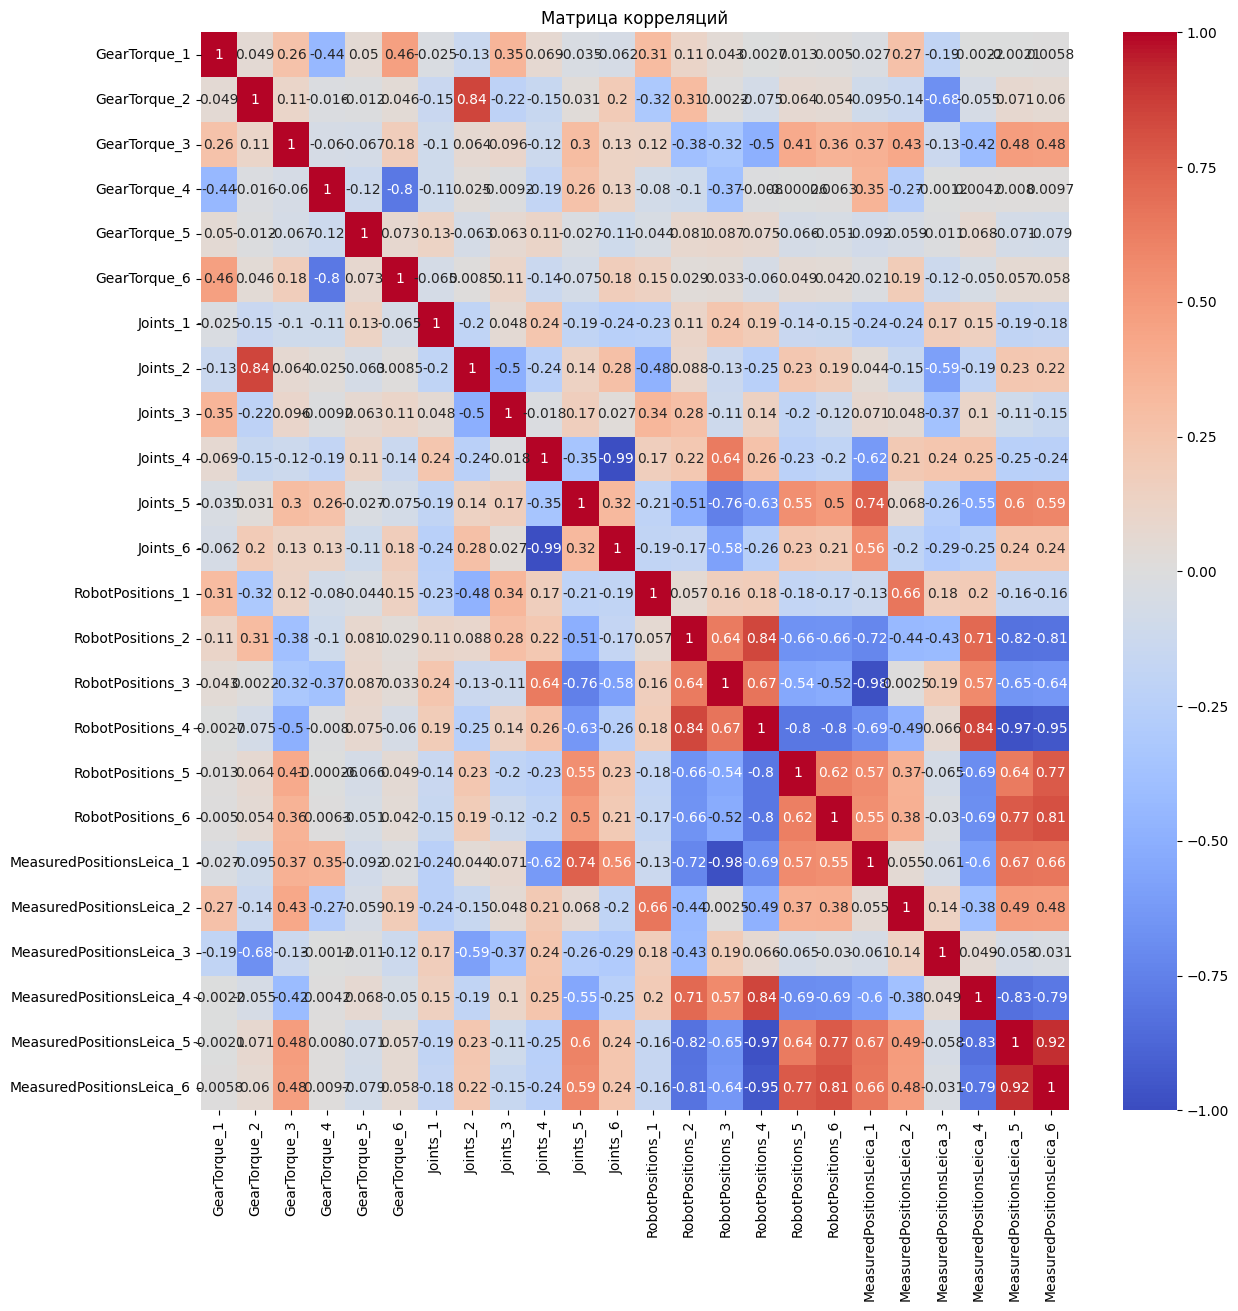

In [309]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = result.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

In [310]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(12, 64)   # Входной слой: 6 -> 64 нейрона
        self.fc2 = nn.Linear(64, 32)  # Скрытый слой: 64 -> 32 нейрона
        self.fc3 = nn.Linear(32, 6)   # Выходной слой: 32 -> 3 нейрона (x, y, z)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Активация ReLU после первого слоя
        x = F.relu(self.fc2(x))  # Активация ReLU после второго слоя
        x = self.fc3(x)          # Выходной слой без активации
        return x

# Пример создания модели
model = SimpleModel()

In [275]:
y_train

,RobotPositions_1,RobotPositions_2,RobotPositions_3,RobotPositions_6
0,,,,
145,-0.041740,-0.105161,-0.888471,0.036138
307,-0.582931,0.397391,-0.405898,0.032620
235,1.852451,-1.864097,-0.647186,0.032193
221,1.311256,1.151235,-0.647184,0.032496
820,0.770053,0.648668,2.006985,0.034539
...,...,...,...,...
71,-0.041737,-0.356437,-1.371050,0.032845
106,0.228862,0.146115,-1.129761,0.032571
271,-0.041735,-0.858987,-0.647185,0.032343


In [311]:
criterion = nn.MSELoss()  # Функция потерь MSE
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam
num_epochs = 300  # Количество эпох

In [312]:
train_data = TensorDataset(torch.FloatTensor(X_train.to_numpy()), torch.FloatTensor(y_train.to_numpy()))
test_data = TensorDataset(torch.FloatTensor(X_test.to_numpy()), torch.FloatTensor(y_test.to_numpy()))

# Создание DataLoader
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [313]:
for epoch in range(num_epochs):
    model.train()  # Режим обучения
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Обнуляем градиенты
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass и оптимизация
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    # Вывод статистики
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/300, Loss: 0.8451
Epoch 2/300, Loss: 0.7191
Epoch 3/300, Loss: 0.5990
Epoch 4/300, Loss: 0.4881
Epoch 5/300, Loss: 0.3922
Epoch 6/300, Loss: 0.3328
Epoch 7/300, Loss: 0.3046
Epoch 8/300, Loss: 0.2861
Epoch 9/300, Loss: 0.2657
Epoch 10/300, Loss: 0.2513
Epoch 11/300, Loss: 0.2384
Epoch 12/300, Loss: 0.2247
Epoch 13/300, Loss: 0.2136
Epoch 14/300, Loss: 0.2024
Epoch 15/300, Loss: 0.1943
Epoch 16/300, Loss: 0.1874
Epoch 17/300, Loss: 0.1795
Epoch 18/300, Loss: 0.1740
Epoch 19/300, Loss: 0.1660
Epoch 20/300, Loss: 0.1622
Epoch 21/300, Loss: 0.1577
Epoch 22/300, Loss: 0.1537
Epoch 23/300, Loss: 0.1497
Epoch 24/300, Loss: 0.1468
Epoch 25/300, Loss: 0.1444
Epoch 26/300, Loss: 0.1420
Epoch 27/300, Loss: 0.1385
Epoch 28/300, Loss: 0.1362
Epoch 29/300, Loss: 0.1359
Epoch 30/300, Loss: 0.1326
Epoch 31/300, Loss: 0.1304
Epoch 32/300, Loss: 0.1280
Epoch 33/300, Loss: 0.1270
Epoch 34/300, Loss: 0.1251
Epoch 35/300, Loss: 0.1238
Epoch 36/300, Loss: 0.1219
Epoch 37/300, Loss: 0.1213
Epoch 38/3

Metric               Feature 1    Feature 2    Feature 3    Feature 4   
-----------------------------------------------------------------
R2                  0.9754      0.9843      0.9908      0.9633      0.8324      0.6434      
MSE                 0.0223      0.0154      0.0084      0.0349      0.1241      0.3318      
MAE                 0.0878      0.0744      0.0585      0.0908      0.1594      0.2730      
Explained Variance  0.9755      0.9844      0.9909      0.9634      0.8336      0.6435      


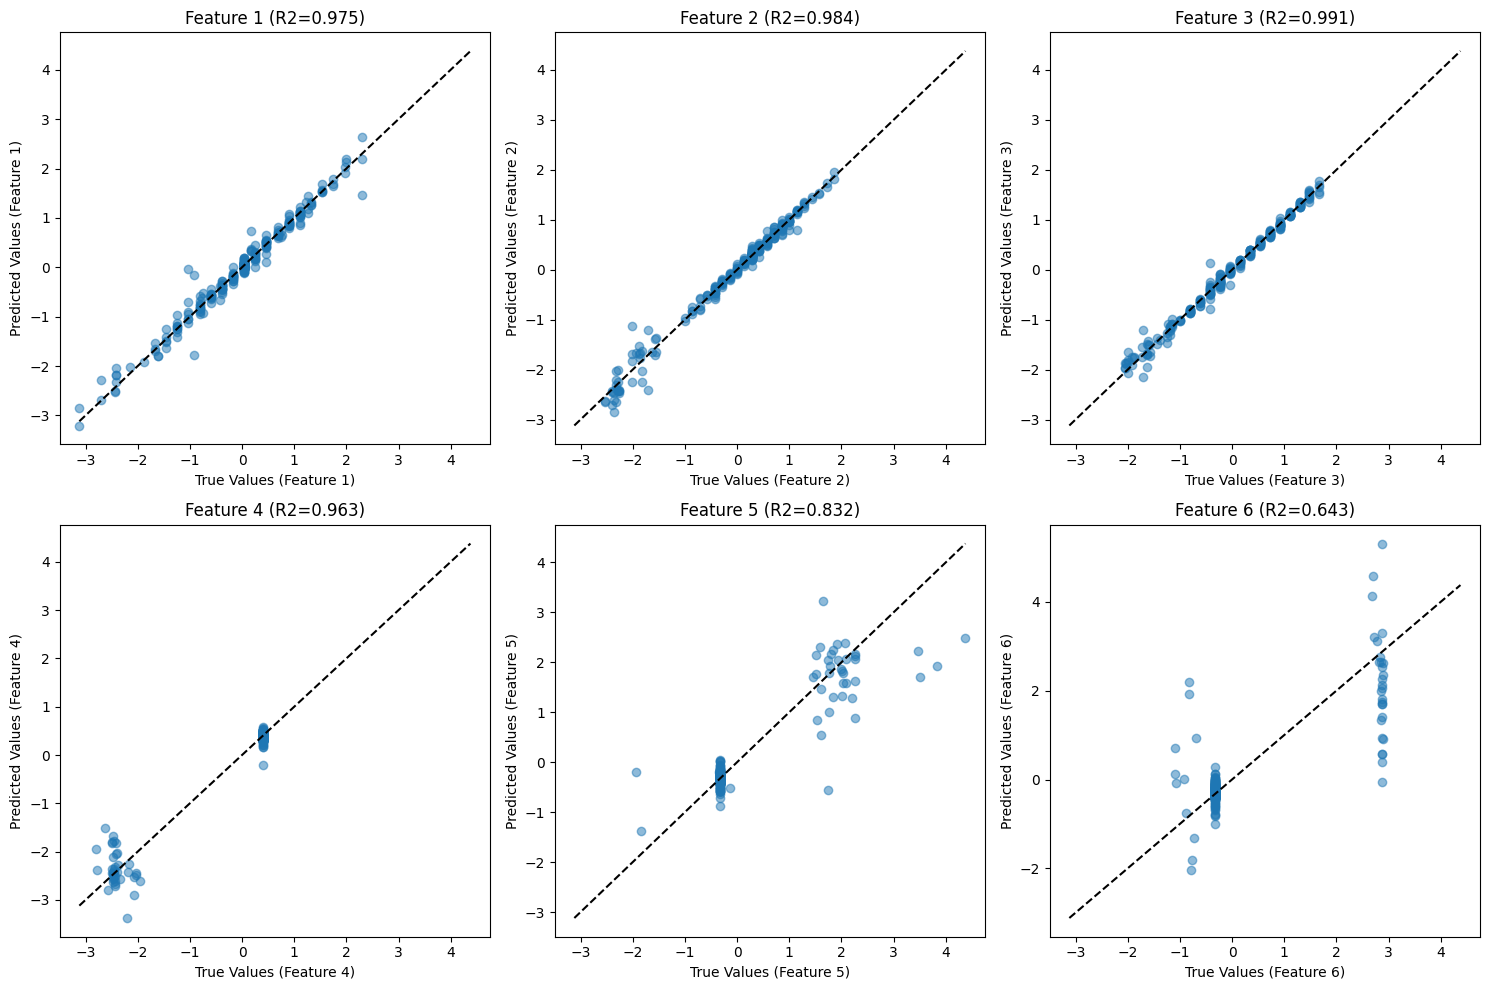


Дополнительные метрики:
Средний R2: 0.8983
Средний MSE: 0.0895
Средний MAE: 0.1240
Объясненная дисперсия: 0.8985


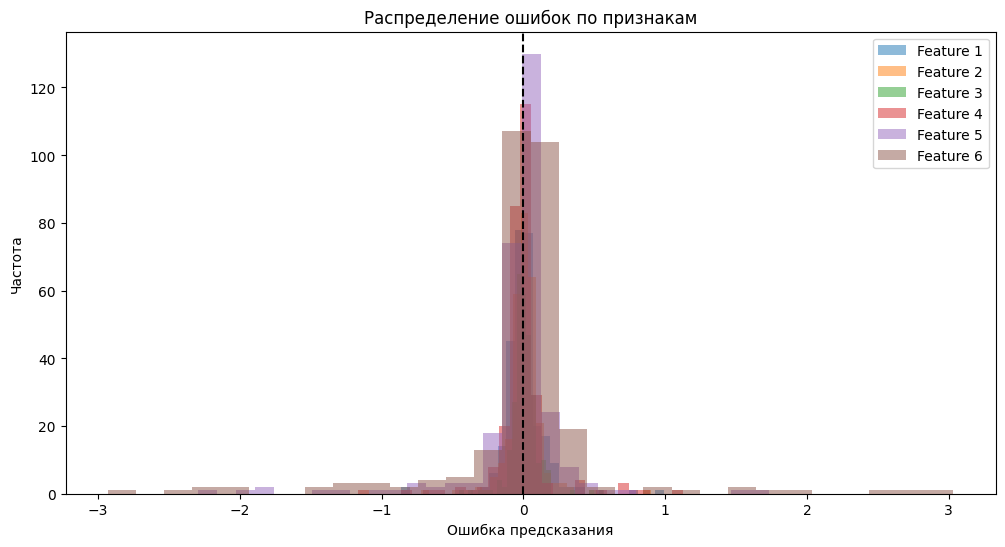

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# 1. Предсказание на тестовых данных
model.eval()  # Переводим модель в режим оценки
all_targets = []
all_predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        all_targets.append(targets.numpy())
        all_predictions.append(outputs.numpy())

# Конвертируем в numpy массивы
y_true = np.vstack(all_targets)
y_pred = np.vstack(all_predictions)

# 2. Вычисление метрик для каждого целевого признака
metrics = {
    'R2': r2_score,
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'Explained Variance': explained_variance_score
}

results = {}
for metric_name, metric_fn in metrics.items():
    results[metric_name] = [metric_fn(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]

# 3. Вывод результатов в таблице
print(f"{'Metric':<20} {'Feature 1':<12} {'Feature 2':<12} {'Feature 3':<12} {'Feature 4':<12}")
print("-" * 65)
for metric, values in results.items():
    print(f"{metric:<20}", end="")
    for val in values:
        print(f"{val:.4f}".ljust(12), end="")
    print()

# 4. Визуализация результатов
plt.figure(figsize=(15, 10))

# График истинных vs предсказанных значений
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_true[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel(f'True Values (Feature {i+1})')
    plt.ylabel(f'Predicted Values (Feature {i+1})')
    plt.title(f'Feature {i+1} (R2={results["R2"][i]:.3f})')

plt.tight_layout()
plt.show()

# 5. Дополнительные метрики (по всем признакам)
print("\nДополнительные метрики:")
print(f"Средний R2: {np.mean(results['R2']):.4f}")
print(f"Средний MSE: {np.mean(results['MSE']):.4f}")
print(f"Средний MAE: {np.mean(results['MAE']):.4f}")
print(f"Объясненная дисперсия: {explained_variance_score(y_true, y_pred, multioutput='uniform_average'):.4f}")

# 6. Гистограмма ошибок
errors = y_pred - y_true
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.hist(errors[:, i], bins=30, alpha=0.5, label=f'Feature {i+1}')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок по признакам')
plt.legend()
plt.show()